## Croisement 1 - Croisement produits

Objectif : 
Pour les produit commercés / transportés pour les flux concernant le datasprint, obtenir 3 ensembles :
- ensemble 1 - produits qu'on retrouve à la fois dans Toflit18 et Portic
- ensemble 2 - produits qu'on retrouve exclusivement dans Toflit18
- ensemble 3 - produits qu'on retrouve exclusivement dans Portic

In [8]:
from poitousprint import Portic, Toflit, get_pointcalls_commodity_purposes_as_toflit_product

toflit_client = Toflit()
portic_client = Portic()


In [16]:
# choix d'une classification d'alignement
chosen_classificationx = ['product_source', 'product_orthographic', 'product_simplification', 'product_revolutionempire']


In [17]:
# récupération des pointcalls Portic qui concernent le datasprint
pointcalls_datasprint = portic_client.get_pointcalls(
 year = 1789,
 pointcall_admiralty = ['La Rochelle', 'Marennes', 'Sables d\'Olonne']
)

# enrichissement de ces pointcalls avec la propriété 'commodity_as_toflit' qui nous donne l'équivalent des produits navigo dans Toflit18 avec la classification choisie
croisement_produits = get_pointcalls_commodity_purposes_as_toflit_product(pointcalls_datasprint, product_classification=chosen_classification)

In [18]:
navigo_products_for_datasprint = set()
for pointcall in croisement_produits:
    if pointcall['commodity_purposes'] is not None:
        for commodity in pointcall['commodity_purposes']:
            navigo_products_for_datasprint.add(commodity['commodity_as_toflit'])

navigo_products_for_datasprint

{'???',
 None,
 'ails',
 'ardoises',
 'avoine',
 'baillarge',
 'beurre',
 'biscuit',
 'bière',
 'blé',
 'bois',
 'bois de charpente',
 'bois de navire',
 'bois pour brûler',
 'bois pour construction',
 'bordage',
 'bouteilles',
 'bouteilles vides',
 'brai',
 'briques',
 'bûches',
 'café',
 'café avarié',
 'canons',
 'carreaux',
 'cendre',
 'cendre de lessive',
 'cercles',
 'cerises',
 'chanvre',
 'charbon',
 'charbon de bois',
 'charbon de terre',
 'chaux',
 'copeaux',
 'cordage vieux',
 'coton',
 'cuivre',
 'divers',
 'eau-de-vie',
 'fagots',
 'faire la pêche au poisson frais',
 'farine',
 'faïence',
 'fer',
 'fer vieux',
 'feuillards',
 'fourrages',
 'fourrages en fagots',
 'fromage',
 'fruits',
 'fumier',
 'futailles',
 'futailles vides',
 'fèves',
 'fûts',
 'goudron',
 'graine de lin',
 'grains',
 'grains baillarge',
 'grains blé',
 'grains de lin',
 'grains divers',
 'grains froment',
 'grains méteil',
 'grains orge',
 'hardes',
 'huile',
 'huîtres',
 'laine',
 'lard salé',
 'lent

In [19]:
# récupération des flows Toflit18 qui concernent le datasprint
flows = toflit_client.get_flows(
    year=1789, 
    customs_region='La Rochelle',
)

toflit_products_for_datasprint = set()
for flow in flows:
    toflit_products_for_datasprint.add(flow[chosen_classification])

toflit_products_for_datasprint

{'Marly',
 'Nankin',
 'acier',
 'agrès',
 'alun',
 'amandes',
 'amidon',
 'ancres de fer',
 'anisette',
 'armes blanches',
 'avoine',
 'azur',
 'babassis',
 'bajutapau',
 'baleine',
 'baleine coupée',
 "barres d'anspect en bois",
 'barres de fer',
 'bas de soie',
 'bayette',
 'beurre',
 'biscuit',
 'biscuit de mer',
 'bière',
 'bois',
 "bois d'acajou",
 'bois de Brésil',
 'bois de Caliatour',
 'bois de Campêche',
 'bois de Pernambouc',
 'bois de chêne',
 'bois de menuiserie',
 'bois de sapin',
 'bois et écorces de chêne et de frêne',
 'bois jaune',
 'bois osier',
 'bois pour brûler',
 'bois pour brûler et fagots',
 'bois pour construction',
 'bois pour construction de sapin',
 'bonneterie de coton',
 'bonneterie de fil',
 'bonneterie de laine',
 'bonneterie de soie',
 'bonnets de laine',
 'bordage',
 'bordage de chêne',
 'bordage de sapin',
 'brai',
 'brai et goudron',
 'brai gras',
 'brai gras et sec',
 'brai sec',
 'broderie',
 'bâtiments naufragés',
 'bœuf',
 'bœuf salé',
 'cacao',


In [20]:
result1 = toflit_products_for_datasprint.intersection(navigo_products_for_datasprint)

result2 = toflit_products_for_datasprint.difference(navigo_products_for_datasprint)

result3 = navigo_products_for_datasprint.difference(toflit_products_for_datasprint)

print("ensemble 1 - produits qu'on retrouve à la fois dans Toflit18 et Portic :\n", result1)
print("\n\nensemble 2 - produits qu'on retrouve exclusivement dans Toflit18 : \n", result2)
print("\n\nensemble 3 - produits qu'on retrouve exclusivement dans Portic : \n", result3)


ensemble 1 - produits qu'on retrouve à la fois dans Toflit18 et Portic :
 {'chanvre', 'avoine', 'merrains', 'pierres', 'charbon de terre', 'bois', 'fer', 'café avarié', 'bois pour brûler', 'futailles vides', 'vinaigre', 'étoupes', 'grains méteil', 'grains divers', 'bordage', 'brai', 'noix', 'beurre', 'fer vieux', 'vaches', 'goudron', 'café', 'résines', 'grains froment', 'graine de lin', 'fagots', 'marchandises', 'fromage', 'mobilier', 'morue verte', 'grains orge', 'cuivre', 'farine', 'bois pour construction', 'futailles', 'charbon de bois', 'bière', 'faïence', 'sel', 'lin', 'eau-de-vie', 'biscuit', 'sardines salées', 'chaux', 'plâtre', 'verges à moulins', 'lard salé', 'suif', 'fèves', 'coton', 'oignons', 'laine', 'sardines', 'vin', 'savon'}


ensemble 2 - produits qu'on retrouve exclusivement dans Toflit18 : 
 {'chanvre en rames', 'mouchoirs des Indes', 'planches de cuivre', 'peaux de martre', 'toile à carreaux et de lin', 'anisette', 'limes', 'mélasse rhum sirop taffia', 'fèves blanch

In [21]:
# écriture dans un fichier txt

# write data in a file.
fichier_texte = open('preliminary_inquiry/dumps/croisement_produits_datasprint_' + chosen_classification + '.txt',"w")
L = ["This is Delhi \n","This is Paris \n","This is London \n"] 
  
# \n is placed to indicate EOL (End of Line)
fichier_texte.write("ensemble 1 - produits qu'on retrouve à la fois dans Toflit18 et Portic :\n") 
for produit in result1:
    fichier_texte.write(str(produit)+"\n")

fichier_texte.write("\n\n\nensemble 2 - produits qu'on retrouve exclusivement dans Toflit18 :\n") 
for produit in result2:
    fichier_texte.write(str(produit)+"\n")

fichier_texte.write("\n\n\nensemble 3 - produits qu'on retrouve exclusivement dans Portic :\n") 
for produit in result3:
    fichier_texte.write(str(produit)+"\n")
    # file1.writelines(L)

fichier_texte.close() #to change file access modes
  
# file1 = open("myfile.txt","r+") 

## Croisement 2 - Croisement ports / bureaux des Fermes

### Objectif : Représenter l'intersection et l'exclusion des ports Navigo avec les bureaux des Fermes Toflit

- grosseur des liens dépend du nombre de pointcalls concernés
- colorer de la même manière tous les ports rattachés à un même bureau des Fermes

=> diagramme alluvial avec RAWGraphs

In [1]:
from poitousprint import Portic, Toflit, get_pointcalls_commodity_purposes_as_toflit_product

toflit_client = Toflit()
portic_client = Portic()

In [5]:
# récupération de tous les ports navigo concernés

pointcalls_datasprint = portic_client.get_pointcalls(
 year = 1789,
 pointcall_admiralty = ['La Rochelle', 'Marennes', 'Sables d\'Olonne'],
 # si on utilise source_subset = 'Poitou_1789' on aura des ports qui ne correspondent pas à la direction des Fermes de La Rochelle => trop de ports (invisualisable)
 params = ['pointcall', 'ferme_bureau', 'pointcall_admiralty', 'source_subset']
)

pointcalls_datasprint[0:9]

[{'pointcall': 'Ile de Ré',
  'ferme_bureau': None,
  'pointcall_admiralty': 'La Rochelle',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Ile de Ré',
  'ferme_bureau': None,
  'pointcall_admiralty': 'La Rochelle',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Ile de Ré',
  'ferme_bureau': None,
  'pointcall_admiralty': 'La Rochelle',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Esnandes',
  'ferme_bureau': 'La Rochelle',
  'pointcall_admiralty': 'La Rochelle',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Le Plomb',
  'ferme_bureau': None,
  'pointcall_admiralty': 'La Rochelle',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Le Plomb',
  'ferme_bureau': None,
  'pointcall_admiralty': 'La Rochelle',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Oléron',
  'ferme_bureau': None,
  'pointcall_admiralty': 'Marennes',
  'source_subset': 'Poitou_1789'},
 {'pointcall': 'Oléron',
  'ferme_bureau': None,
  'pointcall_admiralty': 'Marennes',
  'source_subset': 'Poito

In [6]:
# écriture des croisements dans un csv pour nourrir RAWGraphs
import csv
from csv import DictWriter

# tableau qui contient une ligne par pointcall (avec à chaque fois le port Navigo qui correspond à un bureau Toflit) 
with open('dumps/croisement_ports_bureaux_datasprint.csv', 'w', newline='') as csvfile:
        fieldnames = ['port_Navigo','ferme_bureau_Toflit']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for pointcall in pointcalls_datasprint:
            
            # remplacer par "pas de bureau rattaché" plutot que None quand le port n'a pas de bureau des Fermes associé
            bureau = pointcall['ferme_bureau']
            if bureau is None:
                bureau = "pas de bureau rattaché"
            writer.writerow({
                'port_Navigo':pointcall['pointcall'],
                'ferme_bureau_Toflit':bureau
            })


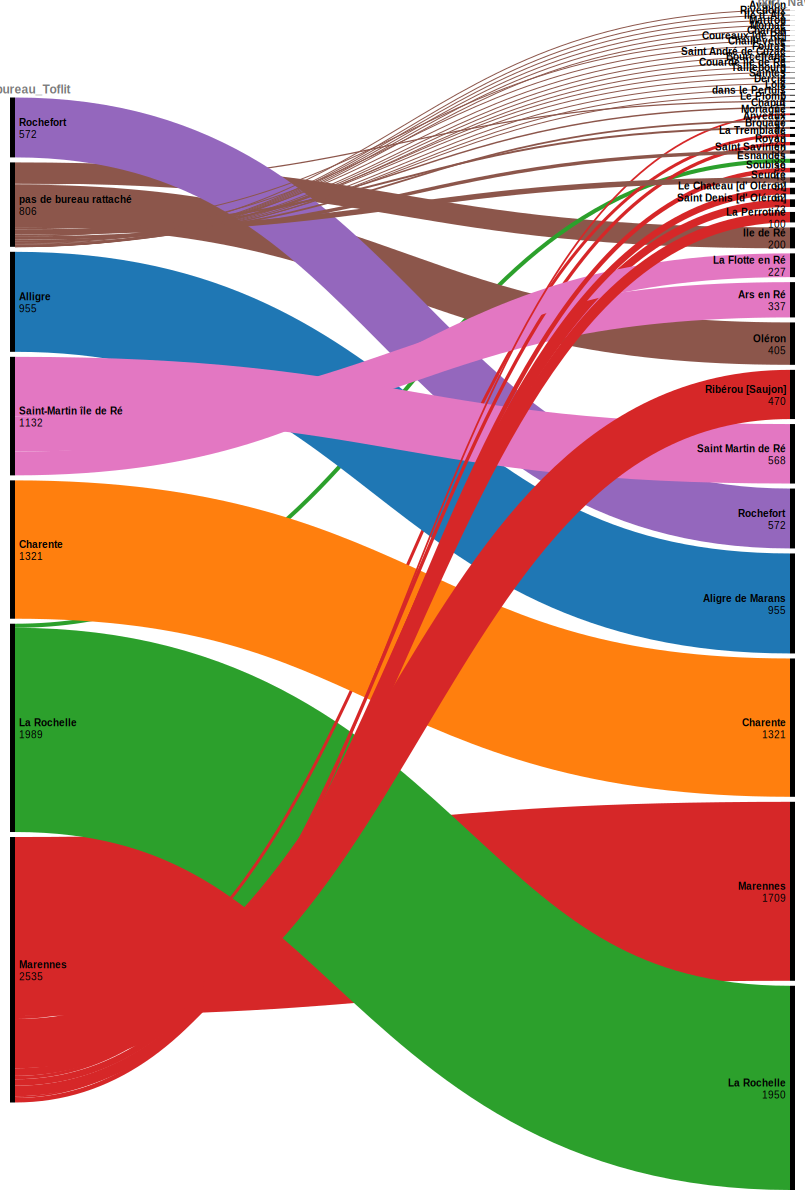

In [8]:
from IPython.core.display import SVG
SVG(filename='dumps/visualisations/croisement ports Portic : bureaux des Fermes Navigo - datasprint PORTIC 2021/diagramme_alluvial_ports_directions.svg')

## Croisement 3 - Croisement ports / partenaires commerciaux 

### Objectif : obtenir un diagramme alluvial qui représente le croisement entre ports Navigo dans lesquels on a des pointcalls 'In' (ce qu'on pourrait analyser comme des destinataires d'exports) et les partenaires commerciaux Toflit18 pour les flux concernant le sprint

=> RAWGraphs

In [1]:
from poitousprint import Portic, Toflit, get_pointcalls_port_as_toflit_partner

toflit_client = Toflit()
portic_client = Portic()

In [2]:
chosen_pointcall_actions = 'In'

In [3]:
# récupération de tous les ports navigo concernés

pointcalls_datasprint = portic_client.get_pointcalls(
 # year = 1789,
 # pointcall_admiralty = ['La Rochelle', 'Marennes', 'Sables d\'Olonne'],
 source_subset = 'Poitou_1789',
 pointcall_action = chosen_pointcall_actions
)

croisement_partners = get_pointcalls_port_as_toflit_partner(pointcalls_datasprint, 'partner_grouping')
print(croisement_partners[0:1])

[{'pkid': 93362, 'record_id': '00349916', 'pointcall': 'Arzon', 'pointcall_uhgs_id': 'A0145524', 'toponyme_fr': 'Arzon', 'toponyme_en': 'Arzon', 'latitude': '47.549033', 'longitude': '-2.893367', 'pointcall_admiralty': 'Vannes', 'pointcall_province': 'Bretagne', 'pointcall_states': '[{"1749-1815" : "France"}]', 'pointcall_substates': None, 'pointcall_states_en': '[{"1749-1815" : "France"}]', 'pointcall_substates_en': None, 'state_1789_fr': 'France', 'state_1789_en': 'France', 'substate_1789_fr': None, 'substate_1789_en': None, 'source_1787_available': False, 'source_1789_available': False, 'pointcall_status': None, 'shiparea': 'ACE-IROI', 'pointcall_point': '0101000020110F0000D5408190A0A813C166F399CFC6025741', 'ferme_direction': None, 'ferme_bureau': None, 'ferme_bureau_uncertainty': None, 'partner_balance_1789': None, 'partner_balance_supp_1789': 'France', 'partner_balance_1789_uncertainty': None, 'partner_balance_supp_1789_uncertainty': 0.0, 'pointcall_out_date': None, 'pointcall_act

In [5]:
# écriture des alignements dans un dict avec une ligne par match pour grossir les liens selon quantité de pointcalls concernés dans le diagramme alluvial
ports_navigo = []

for pointcall in croisement_partners: 
    # remplacer par "pas de partenaire commercial rattaché" plutot que None quand le port Navigo ne correspond pas à un partenaire Toflit18
    partner = pointcall['pointcall_as_toflit_partner']
    if partner is None:
        partner = "pas de partenaire commercial rattaché"
        
    ports_navigo.append({
        'port_navigo': pointcall['pointcall'],
        'toflit_partner':partner
    })

ports_navigo[0:10]

[{'port_navigo': 'Arzon', 'toflit_partner': 'France'},
 {'port_navigo': 'Côte de Bretagne', 'toflit_partner': 'France'},
 {'port_navigo': "Saint Michel en l' Herm", 'toflit_partner': 'France'},
 {'port_navigo': 'Ile de Ré', 'toflit_partner': 'France'},
 {'port_navigo': 'Ile de Ré', 'toflit_partner': 'France'},
 {'port_navigo': 'Ile de Ré', 'toflit_partner': 'France'},
 {'port_navigo': 'Esnandes', 'toflit_partner': 'France'},
 {'port_navigo': 'Le Plomb', 'toflit_partner': 'France'},
 {'port_navigo': 'Le Plomb', 'toflit_partner': 'France'},
 {'port_navigo': 'Oléron', 'toflit_partner': 'France'}]

In [6]:
# écriture dans un csv
import csv
from csv import DictWriter

# tableau qui contient une colonne par clé de dict 
with open('dumps/croisement_ports_' + str(chosen_pointcall_actions) + '_partners_datasprint.csv', 'w', newline='') as csvfile:
        fieldnames = ['port_navigo','toflit_partner']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for pointcall in ports_navigo:
            writer.writerow(pointcall)

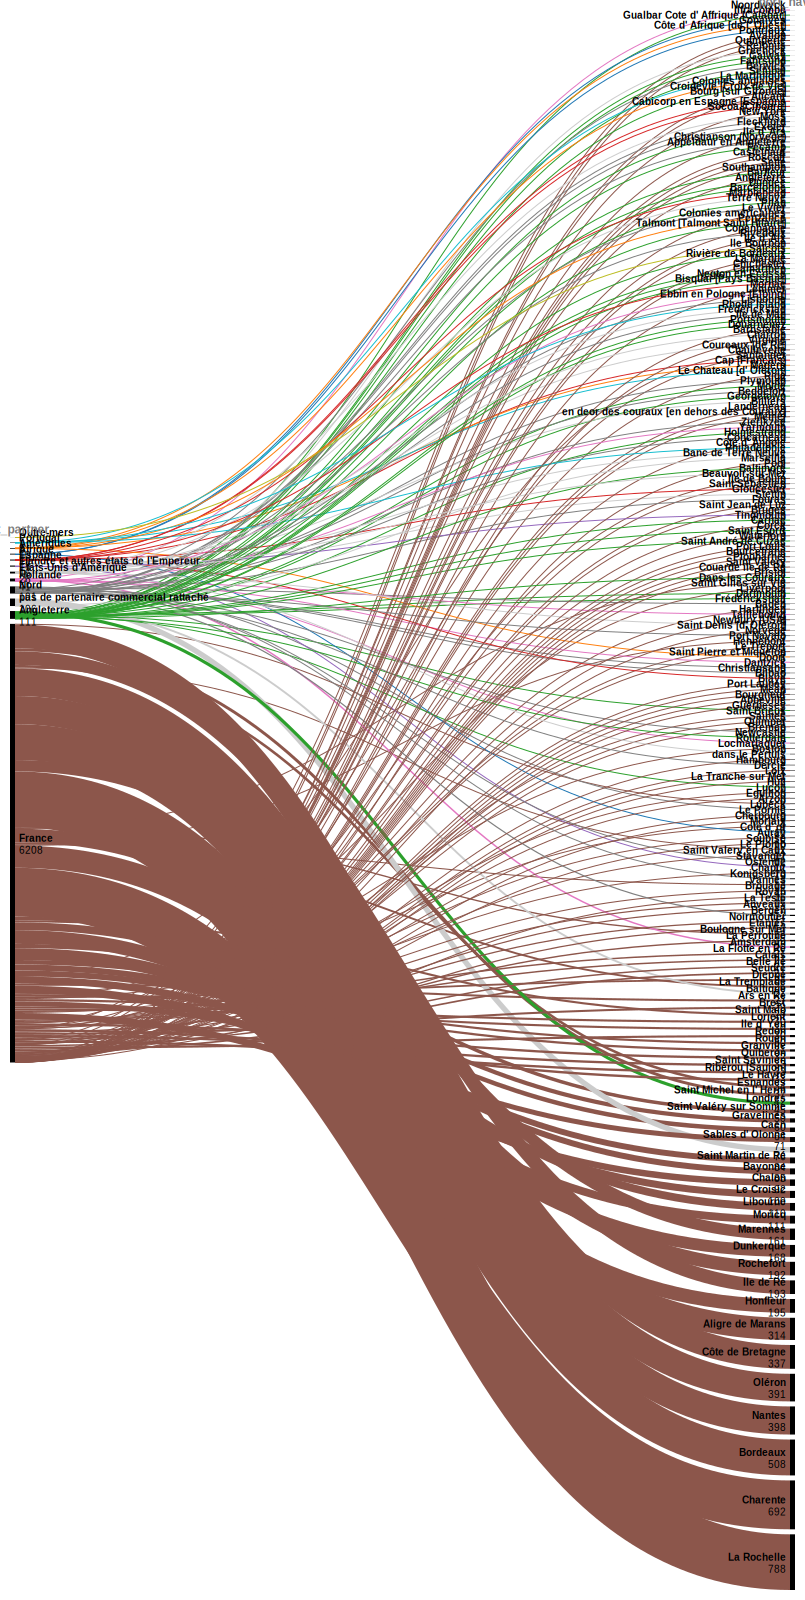

In [7]:
from IPython.core.display import SVG
SVG(filename='dumps/visualisations/croisement ports Portic : bureaux des Fermes Navigo - datasprint PORTIC 2021/diagramme_alluvial_ports_partners.svg')

## Enquête Navigo

#### Objectif : visualisation des données disponibles et avoir une première vue d'ensemble
- réseaux bipartites departs / destinations
- réseaux monopartites entre ports
=> on peut colorer ces réseaux pour identifier les ports concernés par le sprint, ou bien filtrer les données pour ne construire que les noeuds et liens du réseau qui concernent le sprint

In [1]:
from poitousprint import Portic, Toflit, get_pointcalls_port_as_toflit_partner, get_flows_or_travels_port_as_toflit_partner
import json
import networkx as nx
from ipysigma import Sigma

portic_client = Portic()
toflit_client = Toflit()

# this function allows to map a value from a domain of min-max to another
def map_value(value, domain_min, domain_max, range_min, range_max):
    left_span = domain_max - domain_min
    right_span = range_max - range_min

    # Convert the left range into a 0-1 range (float)
    scaled = float(value - domain_min) / float(left_span)

    # Convert the 0-1 range into a value in the right range.
    return range_min + (scaled * right_span)

#### Fonctions génériques qui permettent de fabriquer des réseaux bipartite et monopartite à partir :

1. d'une liste de dicts (ex. flux toflit18)
2. d'une liste de deux propriétés à comparer

In [2]:
def render_coocurrences_graph(data, key_1, key_2, params=None):
    # créer un graphe
    Graph = nx.Graph()

    # créer des dict pour les deux types de noeuds et les liens
    key1_uniq = {}
    key2_uniq = {}
    edges_uniq = {}
    default_params = {
        "color_1": "rgb(0, 255, 0)", # noeuds de type 1 en vert
        "color_2": "rgb(255, 0, 0)", # noeuds de type 2 en rouge
        "node_min_size": 1,
        "node_max_size": 10
    }
    final_params = default_params
    if params is not None :
        final_params = {
            *default_params,
            *params
        }
    
    # remplir les dicts
    for datum in data:
        if key_1 in datum and key_2 in datum:
            value_1 = datum[key_1] if datum[key_1] is not None else "undefined"
            value_2 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_1_id = key_1 + "_" + value_1
            value_2_id = key_2 + "_" + value_2
            if value_1_id in key1_uniq:
                key1_uniq[value_1_id] = {**key1_uniq[value_1_id], "size": key1_uniq[value_1_id]["size"] + 1}
            else:
               key1_uniq[value_1_id] = {
                   "type": key_1, 
                   "name": value_1, 
                   "color": final_params["color_1"],
                   "size": 1
               }
            if value_2_id in key2_uniq:
                key2_uniq[value_2_id] = {**key2_uniq[value_2_id], "size": key2_uniq[value_2_id]["size"] + 1}
            else:
               key2_uniq[value_2_id] = {
                   "type": key_2, 
                   "name": value_2, 
                   "color": final_params["color_2"],
                   "size": 1
               }
            edge_footprint = value_1_id + "-" + value_2_id
            if edge_footprint in edges_uniq:
                edges_uniq[edge_footprint]["weight"] += 1
            else:
                edges_uniq[edge_footprint] = {
                    "source": value_1_id,
                    "target": value_2_id,
                    "weight": 1
                }
    # concaténer les deux dicts de noeuds en un seul
    all_nodes = key1_uniq
    all_nodes.update(key2_uniq)
    # applatir et formatter les noeuds
    nodes = []
    for key, node in all_nodes.items():
        nodes.append((key, node))
    edges = []

    for key, edge in edges_uniq.items():
        edges.append((edge["source"], edge["target"], {"weight": edge["weight"]}))
        
    # ajuster la taille des noeuds en fonction d'un min et d'un max donnés
    domain_min_nodes_size = min([node[1]['size'] for node in nodes])
    domain_max_nodes_size = max([node[1]['size'] for node in nodes])
    range_in_nodes_size = [final_params["node_min_size"], final_params["node_max_size"]]
    nodes_size_mapping_params = [domain_min_nodes_size, domain_max_nodes_size, *range_in_nodes_size]

    for node in nodes:
        node[1]["size"] = map_value(node[1]["size"], *nodes_size_mapping_params)
        node[1]["label"] = node[1]["name"]


    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    return Sigma(Graph, start_layout=True)

In [34]:
def render_monopartite_graph_port_exchanges(data, key_1, key_2, params=None): # data could be Navigo flows or travels 

    # créer un graphe
    Graph = nx.Graph()

    # créer des dict pour l'unique type de noeuds et les liens
    key_uniq = {}
    edges_uniq = {}
    default_params = {
        "color_1": "rgb(0, 255, 0)", # noeuds de type 1 en vert
        "color_2": "rgb(255, 0, 0)", # noeuds de type 2 en rouge
        "node_min_size": 1,
        "node_max_size": 10
    }
    final_params = default_params
    if params is not None :
        final_params = {
            *default_params,
            *params
        }
        
    # remplir les dicts
    for datum in data:
        if key_1 in datum and key_2 in datum:
            value_1 = datum[key_1] if datum[key_1] is not None else "undefined"
            value_2 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_1_id = value_1_id = key_1 + "_" + value_1
            value_2_id = key_2 + "_" + value_2

            if value_1_id in key_uniq:
                key_uniq[value_1_id] = {**key_uniq[value_1_id], "size": key_uniq[value_1_id]["size"] + 1}
            else:
               key_uniq[value_1_id] = {
                   "type": key_1, 
                   "label": value_1, 
                   "color": "rgb(0, 255, 0)",
                   "size": 1
               }

            if value_2_id in key_uniq:
                key_uniq[value_2_id] = {**key_uniq[value_2_id], "size": key_uniq[value_2_id]["size"] + 1}
            else:
               key_uniq[value_2_id] = {
                   "type": key_2, 
                   "label": value_2, 
                   "color": "rgb(0, 255, 0)",
                   "size": 1
               }

            edge_footprint = value_1_id + "-" + value_2_id

            if edge_footprint in edges_uniq:
                edges_uniq[edge_footprint]["weight"] += 1
            else:
                edges_uniq[edge_footprint] = {
                    "source": value_1_id,
                    "target": value_2_id,
                    "weight": 1
                }
    
    
    # concaténer les deux dicts de noeuds en un seul => obsolète dans ce cas
    all_nodes = key_uniq
    # all_nodes.update(# autre dict de noeuds )

    # applatir et formatter les noeuds
    nodes = []
    for key, node in all_nodes.items():
        nodes.append((key, node))
    edges = []

    for key, edge in edges_uniq.items():
        edges.append((edge["source"], edge["target"], {"weight": edge["weight"]}))

    domain_min_nodes_size = min([node[1]['size'] for node in nodes])
    domain_max_nodes_size = max([node[1]['size'] for node in nodes])
    range_in_nodes_size = [1, 10]
    nodes_size_mapping_params = [domain_min_nodes_size, domain_max_nodes_size, *range_in_nodes_size]

    for node in nodes:
        node[1]["size"] = map_value(node[1]["size"], *nodes_size_mapping_params)
        # node[1]["label"] = node[1]["name"]
    
    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    return Sigma(Graph, start_layout=True)

# 0. Je vais chercher les pointcalls / flows / travels du sprint (côté Navigo) pour nourrir mes réseaux

In [3]:
pointcalls_datasprint = portic_client.get_pointcalls(
    year =1789,
    source_subset = 'Poitou_1789')

pointcalls_with_toflit_partners = get_pointcalls_port_as_toflit_partner(pointcalls_datasprint, 'partner_grouping')

In [4]:
pointcalls_with_toflit_partners[0]

{'pkid': 93362,
 'record_id': '00349916',
 'pointcall': 'Arzon',
 'pointcall_uhgs_id': 'A0145524',
 'toponyme_fr': 'Arzon',
 'toponyme_en': 'Arzon',
 'latitude': '47.549033',
 'longitude': '-2.893367',
 'pointcall_admiralty': 'Vannes',
 'pointcall_province': 'Bretagne',
 'pointcall_states': '[{"1749-1815" : "France"}]',
 'pointcall_substates': None,
 'pointcall_states_en': '[{"1749-1815" : "France"}]',
 'pointcall_substates_en': None,
 'state_1789_fr': 'France',
 'state_1789_en': 'France',
 'substate_1789_fr': None,
 'substate_1789_en': None,
 'source_1787_available': False,
 'source_1789_available': False,
 'pointcall_status': None,
 'shiparea': 'ACE-IROI',
 'pointcall_point': '0101000020110F0000D5408190A0A813C166F399CFC6025741',
 'ferme_direction': None,
 'ferme_bureau': None,
 'ferme_bureau_uncertainty': None,
 'partner_balance_1789': None,
 'partner_balance_supp_1789': 'France',
 'partner_balance_1789_uncertainty': None,
 'partner_balance_supp_1789_uncertainty': 0.0,
 'pointcall_ou

In [5]:
len(pointcalls_datasprint)

13829

In [7]:
flows_datasprint = portic_client.get_flows(
        ports = ['A1964694', # je fonctionne avec tous les UHGS_id des ports associés à la direction des fermes de La Rochelle (voir fichier aligenement localités dans le drive : Noirmoutier et Ile de Bouin sont pris en compte)
                'A0171758',
                'A0136930',
                'A0196496',
                'A0198999',
                'A0137148',
                'A0127055',
                'A0133403',
                'A0213721',
                'A0199508',
                'A0148208',
                'A0141325',
                'A0138533',
                'A1964982',
                'A0186515',
                'A0124809',
                'A1964767',
                'A0172590',
                'A0181608',
                'A0165077',
                'A0169240',
                'A0165056',
                'A1963997',
                'A0136403',
                'A0195938',
                'A0122971',
                'A0207992'], # sinon on devrait pouvoir fonctionner avec source_subset = 'Poitou_1789' mais pour l'instant ne fonctionne pas pour moi
    year = 1789)

# cette fonction ajoute les attributs "departure_fr_as_toflit_partner" et "destination_fr_as_toflit_partner" à un flow ou travel navigo (à perfectionner => pour l'instant elle n'associe pas de partenaire aux ports Etrangers du sprint, et ne semble fonctionner que pour la France ...)
flows_with_toflit_partners = get_flows_or_travels_port_as_toflit_partner(flows_datasprint, 'partner_grouping')

In [8]:
flows_with_toflit_partners[0]

{'travel_id': '0000138N- 07',
 'distance_dep_dest': 221.509,
 'distance_homeport_dep': None,
 'departure': 'La Rochelle',
 'departure_fr': 'La Rochelle',
 'departure_en': 'La Rochelle',
 'departure_uhgs_id': 'A0198999',
 'departure_latitude': '46.166667',
 'departure_longitude': '-1.15',
 'departure_admiralty': 'La Rochelle',
 'departure_province': 'Aunis',
 'departure_states': '[{"1749-1815" : "France"}]',
 'departure_substates': None,
 'departure_state_1789_fr': 'France',
 'departure_substate_1789_fr': None,
 'departure_state_1789_en': 'France',
 'departure_substate_1789_en': None,
 'departure_ferme_direction': 'La Rochelle',
 'departure_ferme_bureau': 'La Rochelle',
 'departure_ferme_bureau_uncertainty': 0.0,
 'departure_partner_balance_1789': None,
 'departure_partner_balance_supp_1789': 'France',
 'departure_partner_balance_1789_uncertainty': None,
 'departure_partner_balance_supp_1789_uncertainty': 0,
 'departure_shiparea': 'ACE-ROCH',
 'departure_status': 'siège amirauté',
 'dep

In [9]:
len(flows_datasprint)

7045

In [10]:
travels_datasprint = portic_client.get_travels(source_subset = 'Poitou_1789')

travels_with_toflit_partners = get_flows_or_travels_port_as_toflit_partner(travels_datasprint, 'partner_grouping')

In [11]:
travels_with_toflit_partners[0]

{'travel_id': '0004361N- 16',
 'distance_dep_dest': 102.282,
 'distance_homeport_dep': 379.809,
 'departure': 'Ribérou [Saujon]',
 'departure_fr': 'Ribérou',
 'departure_en': 'Ribérou',
 'departure_uhgs_id': 'A1964767',
 'departure_latitude': '45.6755',
 'departure_longitude': '-0.935826',
 'departure_admiralty': 'Marennes',
 'departure_province': 'Saintonge',
 'departure_states': '[{"1749-1815" : "France"}]',
 'departure_substates': None,
 'departure_state_1789_fr': 'France',
 'departure_substate_1789_fr': None,
 'departure_state_1789_en': 'France',
 'departure_substate_1789_en': None,
 'departure_ferme_direction': 'La Rochelle',
 'departure_ferme_bureau': 'Marennes',
 'departure_ferme_bureau_uncertainty': 0.0,
 'departure_partner_balance_1789': None,
 'departure_partner_balance_supp_1789': 'France',
 'departure_partner_balance_1789_uncertainty': None,
 'departure_partner_balance_supp_1789_uncertainty': 0.0,
 'departure_shiparea': 'ACE-ROCH',
 'departure_status': 'oblique',
 'departur

In [12]:
len(travels_datasprint)

890

# Fabrication de réseaux 

## chaque réseau est construit avec des flows et des travels pour pouvoir comparer les données disponibles sur ces 2 types d'objets Navigo

## 1. Réseaux bipartites : départ / arrivée

#### Si 2 ports font partie du même flow, ou du même travel, ils seront reliés sur le graphe
#### Pour chaque réseau on fonctionne d'abord avec les données des flows, puis les données des travels

##### Légende :
##### - ports de départ en vert
##### - ports d'arrivée en rouge

Remarques : 
- Peut-être intéressant de filtrer les ports de départ / d'arrivée sur la direction des Fermes de La Rochelle (pour savoir où vont les bateaux qui partent de la région / d'où viennent les bateaux arrivent dans la région)
- Avec les flows risque de duplications
- Avec travels on a pas beaucoup de données apparemment

### A. Visualisation de données Navigo pures : réseau port Navigo de départ / port Navigo d'arrivée 

In [66]:
render_coocurrences_graph(flows_datasprint, "departure_fr", "destination_fr")

Sigma(data={'nodes': [('departure_fr_La Rochelle', {'type': 'departure_fr', 'name': 'La Rochelle', 'color': 'r…

In [44]:
render_coocurrences_graph(travels_datasprint, "departure_fr", "destination_fr")

Sigma(data={'nodes': [('departure_fr_Ribérou', {'type': 'departure_fr', 'name': 'Ribérou', 'color': 'rgb(0, 25…

### B. croisement : partenaire Toflit de départ / port Navigo d'arrivée

In [43]:
render_coocurrences_graph(flows_with_toflit_partners, "departure_fr_as_toflit_partner", "destination_fr")

Sigma(data={'nodes': [('departure_fr_as_toflit_partner_France', {'type': 'departure_fr_as_toflit_partner', 'na…

In [42]:
render_coocurrences_graph(travels_with_toflit_partners, "departure_fr_as_toflit_partner", "destination_fr")

Sigma(data={'nodes': [('departure_fr_as_toflit_partner_France', {'type': 'departure_fr_as_toflit_partner', 'na…

### C. croisement : port Navigo de départ / bureau des Fermes Toflit d'arrivée

In [48]:
render_coocurrences_graph(flows_datasprint, "departure_fr", "destination_ferme_bureau")

Sigma(data={'nodes': [('departure_fr_La Rochelle', {'type': 'departure_fr', 'name': 'La Rochelle', 'color': 'r…

In [50]:
render_coocurrences_graph(travels_datasprint, "departure_fr", "destination_ferme_bureau")

Sigma(data={'nodes': [('departure_fr_Ribérou', {'type': 'departure_fr', 'name': 'Ribérou', 'color': 'rgb(0, 25…

### D. croisement (visualisation de données Navigo avec des entités Toflit) : bureau des Fermes Toflit de départ / partenaire Toflit d'arrivée

In [52]:
render_coocurrences_graph(flows_with_toflit_partners, "departure_ferme_bureau", "destination_fr_as_toflit_partner")

Sigma(data={'nodes': [('departure_fr_as_toflit_partner_France', {'type': 'departure_fr_as_toflit_partner', 'na…

In [54]:
render_coocurrences_graph(travels_with_toflit_partners, "departure_ferme_bureau", "destination_fr_as_toflit_partner")

Sigma(data={'nodes': [('departure_ferme_bureau_Marennes', {'type': 'departure_ferme_bureau', 'name': 'Marennes…

## 2. Réseau monopartite : échanges entre ports

#### Si 2 ports sont dans le même flow ou travel, ils sont reliés 
#### Plus les échanges sont intenses, plus les ports sont proches sur le graphe


### A. Visualisation de données Navigo pures : les noeuds sont des ports Navigo

In [35]:
render_monopartite_graph_port_exchanges(flows_datasprint, 'departure_fr', 'destination_fr')

Sigma(data={'nodes': [('departure_fr_La Rochelle', {'type': 'departure_fr', 'label': 'La Rochelle', 'color': '…

In [37]:
render_monopartite_graph_port_exchanges(travels, 'departure_fr', 'destination_fr')

Sigma(data={'nodes': [('departure_fr_Ribérou', {'type': 'departure_fr', 'label': 'Ribérou', 'color': 'rgb(0, 2…

### B. croisement (visualisation de données Navigo avec un agnle de vue Toflit) : les noeuds sont des partenaires Toflit 

In [38]:
render_monopartite_graph_port_exchanges(flows_with_toflit_partners, 'departure_fr_as_toflit_partner', 'destination_fr_as_toflit_partner')

Sigma(data={'nodes': [('departure_fr_as_toflit_partner_France', {'type': 'departure_fr_as_toflit_partner', 'la…

In [39]:
render_monopartite_graph_port_exchanges(travels_with_toflit_partners, 'departure_fr_as_toflit_partner', 'destination_fr_as_toflit_partner')

Sigma(data={'nodes': [('departure_fr_as_toflit_partner_France', {'type': 'departure_fr_as_toflit_partner', 'la…

## Bonus : 
- fonction qui adapte la couleur des noeuds pour qu'on distingue ceux qui font partie du champ d'étude du datasprint / ceux qui n'en font pas partie
- fonction qui filtre le "data" donner pour n'inclure dans le réseau que les entités qui font partie du champ d'étude du datasprint

Entités qui font partie du champ d'étude du datasprint : 
- 27 ports identifiés par leurs ughs_id 
- 7 bureaux des Fermes 
- 1 direction des Fermes

In [75]:
def render_coocurrences_graph_sprint_colored(data, key_1, key_2, params=None):
    # créer un graphe
    Graph = nx.Graph()

    # créer des dict pour les deux types de noeuds et les liens
    key1_uniq = {}
    key2_uniq = {}
    edges_uniq = {}
    default_params = {
        "color_1": "rgb(51, 204, 255)", # noeuds de type 1 en bleu clair
        "color_2": "rgb(238, 130, 238)", # noeuds de type 2 en rose
        "node_min_size": 1,
        "node_max_size": 10
    }
    final_params = default_params
    if params is not None :
        final_params = {
            *default_params,
            *params
        }
        
    # colorer les ports / ou autres entités rattachées à la direction des fermes de La Rochelle (au sprint)
    # en bleu si entité de départ
    # en violet si entité d'arrivée
    sprint_ughs_id = ['A1964694','A0171758','A0136930','A0196496','A0198999','A0137148','A0127055','A0133403','A0213721','A0199508','A0148208','A0141325','A0138533','A1964982','A0186515','A0124809','A1964767','A0172590','A0181608','A0165077','A0169240','A0165056','A1963997','A0136403','A0195938','A0122971','A0207992']
    sprint_bureaux = ['Alligre', 'Saint-Martin île de Ré', 'Marennes', 'Rochefort', 'Charente', 'La Rochelle', 'Sables-d\'Olonne']
    sprint_direction = 'La Rochelle'
    
    # choisir par rapport à quelles valeurs on va filtrer la coloration bleue, en fonction des keys données en argument
    chosen_filter1 = None
    if key_1 == 'departure_fr':
        chosen_filter1 = sprint_ughs_id
    elif key_1 == 'departure_ferme_bureau':
        chosen_filter1 = sprint_bureaux
    elif key_1 == 'departure_ferme_direction':
        chosen_filter1 = sprint_direction 
    
    # choisir par rapport à quelles valeurs on va filtrer la coloration violette, en fonction des keys données en argument
    chosen_filter2 = None
    if key_2 == 'destination_fr':
        chosen_filter2 = sprint_ughs_id
    elif key_2 == 'destination_ferme_bureau':
        chosen_filter2 = sprint_bureaux
    elif key_2 == 'destination_ferme_direction':
        chosen_filter2 = sprint_direction 
    
    # remplir les dicts
    for datum in data:
    
        if key_1 in datum and key_2 in datum:
            value_1 = datum[key_1] if datum[key_1] is not None else "undefined"
            value_2 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_1_id = key_1 + "_" + value_1
            value_2_id = key_2 + "_" + value_2
            
            # on changera la variable color attribuée au noeud s'il passe le filtre de rattachement au sprint
            color = final_params["color_1"]
        
            if value_1_id in key1_uniq:
                key1_uniq[value_1_id] = {**key1_uniq[value_1_id], "size": key1_uniq[value_1_id]["size"] + 1}
            else:
                # coloration en bleu si le noeud se rattache à la direction des fermes de La Rochelle
                if (chosen_filter1 == sprint_ughs_id and datum['departure_uhgs_id'] is not None and datum['departure_uhgs_id'] in sprint_ughs_id):
                    color = "rgb (0, 0, 255)"
                elif (chosen_filter1 == sprint_bureaux and datum['departure_ferme_bureau'] is not None and datum['departure_ferme_bureau'] in sprint_bureaux):
                    color = "rgb (0, 0, 255)"
                elif (chosen_filter1 == sprint_direction and datum['departure_ferme_direction'] is not None and datum['departure_ferme_direction'] in sprint_direction) :
                    color = "rgb (0, 0, 255)"
                    
                key1_uniq[value_1_id] = {
                   "type": key_1, 
                   "name": value_1, 
                   "color": color,
                   "size": 1
                }
            
            # on changera la variable color attribuée au noeud s'il passe le filtre de rattachement au sprint
            color = final_params["color_2"]
            
            if value_2_id in key2_uniq:
                key2_uniq[value_2_id] = {**key2_uniq[value_2_id], "size": key2_uniq[value_2_id]["size"] + 1}
            else:
                # coloration en violet si le noeud se rattache à la direction des fermes de La Rochelle
                if (chosen_filter2 == sprint_ughs_id and datum['destination_uhgs_id'] is not None and datum['destination_uhgs_id'] in sprint_ughs_id):
                    color = "rgb(70, 0, 128)"
                elif (chosen_filter2 == sprint_bureaux and datum['destination_ferme_bureau'] is not None and datum['destination_ferme_bureau'] in sprint_bureaux):
                    color = "rgb(70, 0, 128)"
                elif (chosen_filter2 == sprint_direction and datum['destination_ferme_direction'] is not None and datum['destination_ferme_direction'] in sprint_direction) :
                    color = "rgb(70, 0, 128)"
                    
                key2_uniq[value_2_id] = {
                   "type": key_2, 
                   "name": value_2, 
                   "color": color,
                   "size": 1
               }
                
            edge_footprint = value_1_id + "-" + value_2_id
            if edge_footprint in edges_uniq:
                edges_uniq[edge_footprint]["weight"] += 1
            else:
                edges_uniq[edge_footprint] = {
                    "source": value_1_id,
                    "target": value_2_id,
                    "weight": 1
                }
    # concaténer les deux dicts de noeuds en un seul
    all_nodes = key1_uniq
    all_nodes.update(key2_uniq)
    # applatir et formatter les noeuds
    nodes = []
    for key, node in all_nodes.items():
        nodes.append((key, node))
    edges = []

    for key, edge in edges_uniq.items():
        edges.append((edge["source"], edge["target"], {"weight": edge["weight"]}))
        
    # ajuster la taille des noeuds en fonction d'un min et d'un max donnés
    domain_min_nodes_size = min([node[1]['size'] for node in nodes])
    domain_max_nodes_size = max([node[1]['size'] for node in nodes])
    range_in_nodes_size = [final_params["node_min_size"], final_params["node_max_size"]]
    nodes_size_mapping_params = [domain_min_nodes_size, domain_max_nodes_size, *range_in_nodes_size]

    for node in nodes:
        node[1]["size"] = map_value(node[1]["size"], *nodes_size_mapping_params)
        node[1]["label"] = node[1]["name"]


    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    return Sigma(Graph, start_layout=True)

In [77]:
render_coocurrences_graph_sprint_colored(flows_with_toflit_partners, 'departure_ferme_bureau', 'destination_fr_as_toflit_partner')

Sigma(data={'nodes': [('departure_ferme_bureau_La Rochelle', {'type': 'departure_ferme_bureau', 'name': 'La Ro…

In [80]:
def render_coocurrences_graph_sprint_filtered(data, key_1, key_2, params=None):
    
    # créer un graphe
    Graph = nx.Graph()

    # créer des dict pour les deux types de noeuds et les liens
    key1_uniq = {}
    key2_uniq = {}
    edges_uniq = {}
    default_params = {
        "color_1": "rgb(0, 0, 255)", # noeuds de type 1 en bleu foncé
        "color_2": "rgb(70, 0, 128)",# noeuds de type 2 en violet foncé 
        "node_min_size": 1,
        "node_max_size": 10
    }
    final_params = default_params
    if params is not None :
        final_params = {
            *default_params,
            *params
        }
        
    # filtrer les ports / ou autres entités rattachées à la direction des fermes de La Rochelle (au sprint)
    sprint_ughs_id = ['A1964694','A0171758','A0136930','A0196496','A0198999','A0137148','A0127055','A0133403','A0213721','A0199508','A0148208','A0141325','A0138533','A1964982','A0186515','A0124809','A1964767','A0172590','A0181608','A0165077','A0169240','A0165056','A1963997','A0136403','A0195938','A0122971','A0207992']
    sprint_bureaux = ['Alligre', 'Saint-Martin île de Ré', 'Marennes', 'Rochefort', 'Charente', 'La Rochelle', 'Sables-d\'Olonne']
    sprint_direction = 'La Rochelle'
    
    # choisir par rapport à quelles valeurs on va filtrer, en fonction des keys données en argument
    chosen_filter1 = None
    if key_1 == 'departure_fr':
        chosen_filter1 = sprint_ughs_id
    elif key_1 == 'departure_ferme_bureau':
        chosen_filter1 = sprint_bureaux
    elif key_1 == 'departure_ferme_direction':
        chosen_filter1 = sprint_direction 
    
    # choisir par rapport à quelles valeurs on va filtrer la coloration violette, en fonction des keys données en argument
    chosen_filter2 = None
    if key_2 == 'destination_fr':
        chosen_filter2 = sprint_ughs_id
    elif key_2 == 'destination_ferme_bureau':
        chosen_filter2 = sprint_bureaux
    elif key_2 == 'destination_ferme_direction':
        chosen_filter2 = sprint_direction 
    
    # remplir les dicts
    for datum in data:
    
        if key_1 in datum and key_2 in datum:
            value_1 = datum[key_1] if datum[key_1] is not None else "undefined"
            value_2 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_1_id = key_1 + "_" + value_1
            value_2_id = key_2 + "_" + value_2
            
            # on n'ajoutera les noeuds et le lien entre eux que s'ils passent le filtre de rattachement au sprint
            valid_node_1 = False
            valid_node_2 = False
            if (chosen_filter1 == sprint_ughs_id and datum['departure_uhgs_id'] is not None and datum['departure_uhgs_id'] in sprint_ughs_id):
                valid_node_1 = True
            elif (chosen_filter1 == sprint_bureaux and datum['departure_ferme_bureau'] is not None and datum['departure_ferme_bureau'] in sprint_bureaux):
                valid_node_1 = True
            elif (chosen_filter1 == sprint_direction and datum['departure_ferme_direction'] is not None and datum['departure_ferme_direction'] in sprint_direction) :
                valid_node_1 = True
            if (chosen_filter2 == sprint_ughs_id and datum['destination_uhgs_id'] is not None and datum['destination_uhgs_id'] in sprint_ughs_id):
                valid_node_2 = True
            elif (chosen_filter2 == sprint_bureaux and datum['destination_ferme_bureau'] is not None and datum['destination_ferme_bureau'] in sprint_bureaux):
                valid_node_2 = True
            elif (chosen_filter2 == sprint_direction and datum['destination_ferme_direction'] is not None and datum['destination_ferme_direction'] in sprint_direction) :
                valid_node_2 = True
            
            if valid_node_1 and valid_node_2:
                
                if value_1_id in key1_uniq:
                    key1_uniq[value_1_id] = {**key1_uniq[value_1_id], "size": key1_uniq[value_1_id]["size"] + 1}
                else:
                    key1_uniq[value_1_id] = {
                       "type": key_1, 
                       "name": value_1, 
                       "color": final_params['color_1'],
                       "size": 1
                    }

                if value_2_id in key2_uniq:
                    key2_uniq[value_2_id] = {**key2_uniq[value_2_id], "size": key2_uniq[value_2_id]["size"] + 1}
                else:
                    key2_uniq[value_2_id] = {
                       "type": key_2, 
                       "name": value_2, 
                       "color": final_params['color_2'],
                       "size": 1
                    }

                edge_footprint = value_1_id + "-" + value_2_id
                if edge_footprint in edges_uniq:
                    edges_uniq[edge_footprint]["weight"] += 1
                else:
                    edges_uniq[edge_footprint] = {
                        "source": value_1_id,
                        "target": value_2_id,
                        "weight": 1
                    }
                    
    # concaténer les deux dicts de noeuds en un seul
    all_nodes = key1_uniq
    all_nodes.update(key2_uniq)
    # applatir et formatter les noeuds
    nodes = []
    for key, node in all_nodes.items():
        nodes.append((key, node))
    edges = []

    for key, edge in edges_uniq.items():
        edges.append((edge["source"], edge["target"], {"weight": edge["weight"]}))
        
    # ajuster la taille des noeuds en fonction d'un min et d'un max donnés
    domain_min_nodes_size = min([node[1]['size'] for node in nodes])
    domain_max_nodes_size = max([node[1]['size'] for node in nodes])
    range_in_nodes_size = [final_params["node_min_size"], final_params["node_max_size"]]
    nodes_size_mapping_params = [domain_min_nodes_size, domain_max_nodes_size, *range_in_nodes_size]

    for node in nodes:
        node[1]["size"] = map_value(node[1]["size"], *nodes_size_mapping_params)
        node[1]["label"] = node[1]["name"]


    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    return Sigma(Graph, start_layout=True)

In [81]:
render_coocurrences_graph_sprint_filtered(flows_datasprint, 'departure_fr','destination_fr')

Sigma(data={'nodes': [('departure_fr_Rochefort', {'type': 'departure_fr', 'name': 'Rochefort', 'color': 'rgb(0…

In [1]:
from poitousprint import Portic, Toflit
import json
import networkx as nx
from ipysigma import Sigma

portic_client = Portic()
toflit_client = Toflit()

# this function allows to map a value from a domain of min-max to another
def map_value(value, domain_min, domain_max, range_min, range_max):
    left_span = domain_max - domain_min
    right_span = range_max - range_min

    # Convert the left range into a 0-1 range (float)
    scaled = float(value - domain_min) / float(left_span)

    # Convert the 0-1 range into a value in the right range.
    return range_min + (scaled * right_span)

#### Fonction générique qui permet de fabriquer un réseau à partir :

1. d'une liste de dicts (ex. flux toflit18)
2. d'une liste de deux propriétés à comparer
3. d'un param filter_import_export que l'on peut mettre sur import ou exports (par défaut on a à la fois les imports et les exports

In [20]:
def render_coocurrences_graph(data, key_1, key_2, filter_export_import=None, params=None):
    if filter_export_import not in [None, 'Exports', 'Imports']:
        print("filter_export_import must be 'Exports', 'Imports' or None")
        raise
    
    # créer un graphe
    Graph = nx.Graph()

    # créer des dict pour les deux types de noeuds et les liens
    key1_uniq = {}
    key2_uniq = {}
    edges_uniq = {}
    default_params = {
        "color_1": "rgb(0, 255, 0)",
        "color_2": "rgb(255, 0, 0)",
        "node_min_size": 1,
        "node_max_size": 10
    }
    final_params = default_params
    if params is not None :
        final_params = {
            *default_params,
            *params
        }
    
    # remplir les dicts
    for datum in data:
        if (filter_export_import is not None and datum['export_import'] != filter_export_import):
            continue
            
        if key_1 in datum and key_2 in datum:
            value_1 = datum[key_1] if datum[key_1] is not None else "undefined"
            value_2 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_1_id = key_1 + "_" + value_1
            value_2_id = key_2 + "_" + value_2
            
            if value_1_id in key1_uniq:
                key1_uniq[value_1_id] = {**key1_uniq[value_1_id], "size": key1_uniq[value_1_id]["size"] + 1}
            else:
               key1_uniq[value_1_id] = {
                   "type": key_1, 
                   "name": value_1, 
                   "color": final_params["color_1"],
                   "size": 1
               }
            
            if value_2_id in key2_uniq:
                key2_uniq[value_2_id] = {**key2_uniq[value_2_id], "size": key2_uniq[value_2_id]["size"] + 1}
            else:
               key2_uniq[value_2_id] = {
                   "type": key_2, 
                   "name": value_2, 
                   "color": final_params["color_2"],
                   "size": 1
               }
            
            edge_footprint = value_1_id + "-" + value_2_id
            if edge_footprint in edges_uniq:
                edges_uniq[edge_footprint]["weight"] += 1
            else:
                edges_uniq[edge_footprint] = {
                    "source": value_1_id,
                    "target": value_2_id,
                    "weight": 1
                }
                
    # concaténer les deux dicts de noeuds en un seul
    all_nodes = key1_uniq
    all_nodes.update(key2_uniq)
    # applatir et formatter les noeuds
    nodes = []
    for key, node in all_nodes.items():
        nodes.append((key, node))
    edges = []

    for key, edge in edges_uniq.items():
        edges.append((edge["source"], edge["target"], {"weight": edge["weight"]}))
        
    # ajuster la taille des noeuds en fonction d'un min et d'un max donnés
    domain_min_nodes_size = min([node[1]['size'] for node in nodes])
    domain_max_nodes_size = max([node[1]['size'] for node in nodes])
    range_in_nodes_size = [final_params["node_min_size"], final_params["node_max_size"]]
    nodes_size_mapping_params = [domain_min_nodes_size, domain_max_nodes_size, *range_in_nodes_size]

    for node in nodes:
        node[1]["size"] = map_value(node[1]["size"], *nodes_size_mapping_params)
        node[1]["label"] = node[1]["name"]


    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    return Sigma(Graph, start_layout=True)

# 0. Je vais chercher les flux du sprint (côté Toflit) pour nourrir mes réseaux

nb : pour les flux concernant le sprint on n'a qu'une seule direction des Fermes : La Rochelle

In [23]:
# je vais chercher les flux qui concernent le sprint côté Toflit

flows = toflit_client.get_flows(
    year=1789,
    customs_region='La Rochelle', 
    params=[
      "product_revolutionempire",
      "partner",
      "export_import",
      "value",
      "line",
      "partner_simplification",
      "customs_office",
      "customs_region"
	]
)
flows[0]    

{'customs_region': 'La Rochelle',
 'partner': 'Petites iles',
 'export_import': 'Exports',
 'value': '15120',
 'customs_office': "Les Sables d'Olonne",
 'partner_simplification': 'Petites Îles',
 'product_revolutionempire': 'Animaux'}

In [24]:
len(flows)

1062

# 1. Réseau bipartite entre les directions des Fermes et les partenaires commerciaux

In [21]:
render_coocurrences_graph(flows, "customs_region", "partner_simplification")

Sigma(data={'nodes': [('customs_region_La Rochelle', {'type': 'customs_region', 'name': 'La Rochelle', 'color'…

# 2. Réseau bipartite entre les bureaux des Fermes et les partenaires commerciaux 

## A. avec filtre sur les imports

In [25]:
render_coocurrences_graph(flows, "customs_office", "partner_simplification", filter_export_import = 'Imports')

Sigma(data={'nodes': [("customs_office_Les Sables d'Olonne", {'type': 'customs_office', 'name': "Les Sables d'…

## B. avec filtre sur les exports

In [26]:
render_coocurrences_graph(flows, "customs_office", "partner_simplification", filter_export_import = 'Exports')

Sigma(data={'nodes': [("customs_office_Les Sables d'Olonne", {'type': 'customs_office', 'name': "Les Sables d'…

# 3. Réseau tripartite entre les bureaux des Fermes, les produits et les partenaires commerciaux

In [30]:
# je customise la fonction de création de Graphe

def render_tripartite_graph(data, key_1, key_2, key_3, filter_export_import=None, params=None):
    if filter_export_import not in [None, 'Exports', 'Imports']:
        print("filter_export_import must be 'Exports', 'Imports' or None")
        raise
    
    # créer un graphe
    Graph = nx.Graph()

    # créer des dict pour les deux types de noeuds et les liens
    key1_uniq = {} # -> products
    key2_uniq = {} # -> partners
    key3_uniq = {} # customs->office
    edges_uniq = {}
    
    default_params = {
        "color_1": "rgb(0, 255, 0)", # noeuds de type 1 en vert
        "color_2": "rgb(255, 0, 0)", # noeuds de type 2 en rouge
        "color_3": "rgb(0, 0, 255)", # noeuds de type 3 en bleu
        "node_min_size": 1,
        "node_max_size": 10
    }
    final_params = default_params
    if params is not None :
        final_params = {
            *default_params,
            *params
        }
        
    # remplir les dicts
    for datum in data:
        
        if (filter_export_import is not None and datum['export_import'] != filter_export_import):
            continue
            
        if key_1 in datum and key_2 in datum and key_3 in datum:
            value_1 = datum[key_1] if datum[key_1] is not None else "undefined"
            value_2 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_3 = datum[key_2] if datum[key_2] is not None else "undefined"
            value_1_id = key_1 + "_" + value_1
            value_2_id = key_2 + "_" + value_2
            value_3_id = key_3 + "_" + value_3
            
            if value_1_id in key1_uniq:
                key1_uniq[value_1_id] = {**key1_uniq[value_1_id], "size": key1_uniq[value_1_id]["size"] + 1}
            else:
               key1_uniq[value_1_id] = {
                   "type": key_1, 
                   "name": value_1, 
                   "color": final_params["color_1"],
                   "size": 1
               }
            if value_2_id in key2_uniq:
                key2_uniq[value_2_id] = {**key2_uniq[value_2_id], "size": key2_uniq[value_2_id]["size"] + 1}
            else:
               key2_uniq[value_2_id] = {
                   "type": key_2, 
                   "name": value_2, 
                   "color": final_params["color_2"],
                   "size": 1
               }
            if value_3_id in key3_uniq:
                key3_uniq[value_3_id] = {**key3_uniq[value_3_id], "size": key3_uniq[value_3_id]["size"] + 1}
            else:
               key3_uniq[value_3_id] = {
                   "type": key_3, 
                   "name": value_3, 
                   "color": final_params["color_3"],
                   "size": 1
               }
            
            edge_footprints = {
                str(value_1_id + "-" + value_2_id): {
                    'source': value_1_id,
                    'target': value_2_id
                }, 
                str(value_2_id + "-" + value_3_id): {
                    'source': value_2_id,
                    'target': value_3_id
                }, 
                str(value_1_id + "-" + value_3_id): {
                    'source': value_1_id,
                    'target': value_3_id
                }
            } 

            for edge_footprint in edge_footprints.keys():
                if edge_footprint in edges_uniq:
                    edges_uniq[edge_footprint]["weight"] += 1
                else:
                    edges_uniq[edge_footprint] = {
                        "source": edge_footprints[edge_footprint]['source'],
                        "target": edge_footprints[edge_footprint]['target'],
                        "weight": 1
                    }
    # concaténer les deux dicts de noeuds en un seul
    all_nodes = key1_uniq
    all_nodes.update(key2_uniq)
    all_nodes.update(key3_uniq) 

    # applatir et formatter les noeuds
    nodes = []
    for key, node in all_nodes.items():
        nodes.append((key, node))
    edges = []

    for key, edge in edges_uniq.items():
        edges.append((edge["source"], edge["target"], {"weight": edge["weight"]}))

    domain_min_nodes_size = min([node[1]['size'] for node in nodes])
    domain_max_nodes_size = max([node[1]['size'] for node in nodes])
    range_in_nodes_size = [1, 10]
    nodes_size_mapping_params = [domain_min_nodes_size, domain_max_nodes_size, *range_in_nodes_size]

    for node in nodes:
        node[1]["size"] = map_value(node[1]["size"], *nodes_size_mapping_params)
        node[1]["label"] = node[1]["name"]


    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)

    return Sigma(Graph, start_layout=True)

## A. avec filtre sur les imports

In [32]:
render_tripartite_graph(flows, "partner", "product_revolutionempire", "customs_office", filter_export_import = 'Imports')

Sigma(data={'nodes': [('partner_Petites iles', {'type': 'partner', 'name': 'Petites iles', 'color': 'rgb(0, 25…

## B. avec filtre sur les exports

In [33]:
render_tripartite_graph(flows, "partner", "product_revolutionempire", "customs_office", filter_export_import = 'Exports')

Sigma(data={'nodes': [('partner_Petites iles', {'type': 'partner', 'name': 'Petites iles', 'color': 'rgb(0, 25…